In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
clientes = pd.read_csv(r"../Base de datos/Clientes.csv")
ventas = pd.read_csv(r"../Base de datos/Ventas.csv")
detalle_ventas = pd.read_csv(r"../Base de datos/Detalle_ventas.csv")

In [5]:
v1 = set(ventas['id_venta'])
v2 = set(detalle_ventas['id_venta'])

print(len(v2 - v1))

0


In [5]:
clientes['Año_mes']=pd.to_datetime(clientes['fecha_alta']).dt.to_period("M")
ventas['Año_mes']=pd.to_datetime(ventas['fecha']).dt.to_period("M")

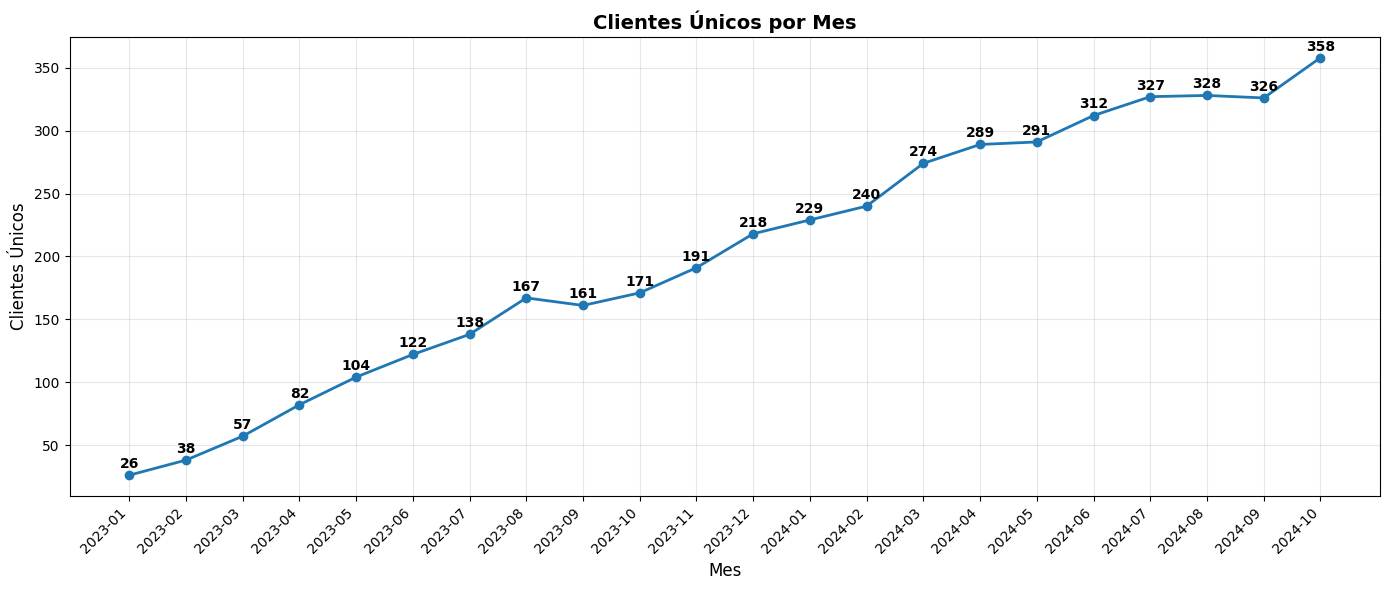

In [6]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 6))

# Preparar los datos
datos = ventas.groupby("Año_mes")['id_cliente'].nunique()
x_labels = datos.index.astype(str)
x_pos = range(len(datos))

# Graficar
ax.plot(x_pos, datos.values, marker='o', linewidth=2, markersize=6)

# Agregar etiquetas de datos sobre cada punto
offset = (max(datos.values) - min(datos.values)) * 0.01  # 3% del rango

for i, valor in enumerate(datos.values):
    ax.text(i, valor + offset, str(valor), 
            ha='center', va='bottom', 
            fontsize=10, fontweight='bold')

# Configurar etiquetas del eje X
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Personalizar el gráfico
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Clientes Únicos', fontsize=12)
ax.set_title('Clientes Únicos por Mes', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

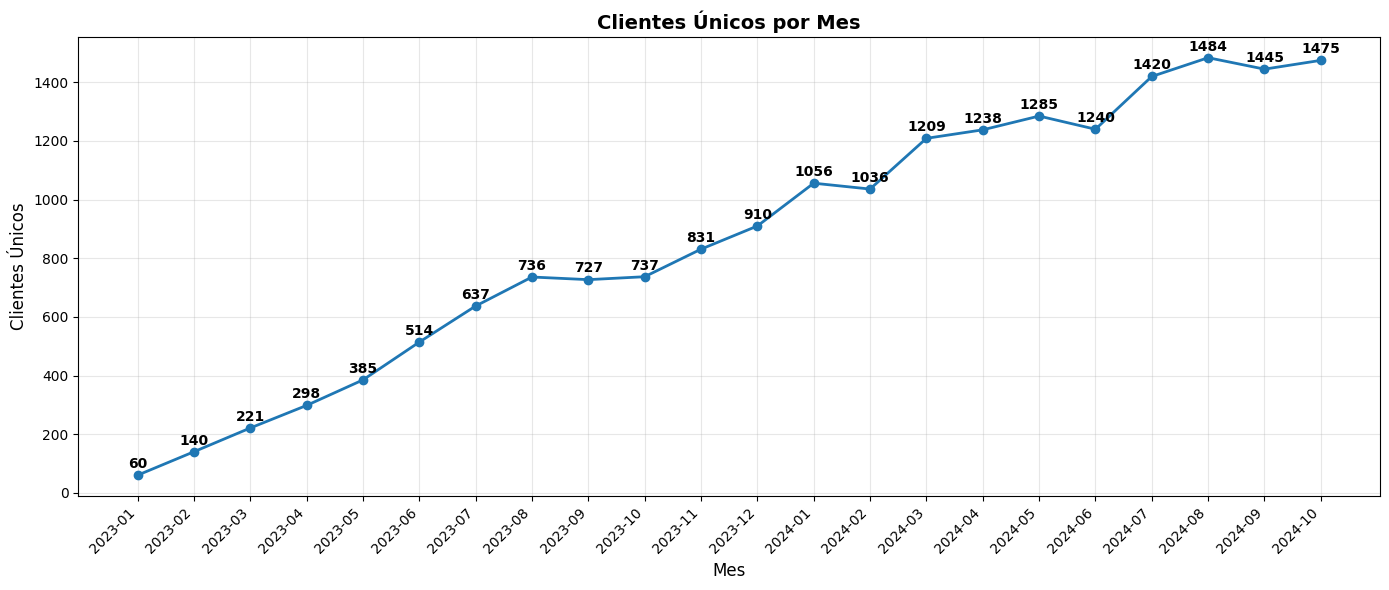

In [7]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(14, 6))

# Preparar los datos
datos = ventas.groupby("Año_mes").size()
x_labels = datos.index.astype(str)
x_pos = range(len(datos))

# Graficar
ax.plot(x_pos, datos.values, marker='o', linewidth=2, markersize=6)

# Agregar etiquetas de datos sobre cada punto
offset = (max(datos.values) - min(datos.values)) * 0.01  # 3% del rango

for i, valor in enumerate(datos.values):
    ax.text(i, valor + offset, str(valor), 
            ha='center', va='bottom', 
            fontsize=10, fontweight='bold')

# Configurar etiquetas del eje X
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Personalizar el gráfico
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Clientes Únicos', fontsize=12)
ax.set_title('Clientes Únicos por Mes', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
detalle_ventas

,id_detalle,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,2,71,Vodka 700ml,4,508.0,2032.0
1,2,3,52,Detergente Líquido 750ml,2,2582.0,5164.0
2,3,3,27,Alfajor Simple,2,2502.0,5004.0
3,4,3,23,Bizcochos Salados,1,2380.0,2380.0
4,5,4,11,Café Molido 250g,1,2053.0,2053.0
...,...,...,...,...,...,...,...
34770,34771,19081,14,Leche Entera 1L,2,1723.0,3446.0
34771,34772,19082,33,Chocolate con Leche 100g,3,1255.0,3765.0
34772,34773,19083,21,Pan Lactal Integral,4,272.0,1088.0
34773,34774,19084,85,Jugo en Polvo Naranja,3,1856.0,5568.0


In [17]:
# Obtener el índice de la fila con mayor cantidad por cada id_venta
idx = detalle_ventas.groupby('id_venta')['cantidad'].idxmax()

# Seleccionar esas filas y quedarte solo con las columnas que necesitas
resultado = detalle_ventas.loc[idx, ['id_venta', 'nombre_producto', 'cantidad']]

In [22]:
detalle_ventas['cantidad'].describe()

count    34775.000000
mean         1.828124
std          0.964810
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: cantidad, dtype: float64

In [20]:
resultado

,id_venta,nombre_producto,cantidad
0,2,Vodka 700ml,4
1,3,Detergente Líquido 750ml,2
5,4,Salsa de Tomate 500g,3
7,5,Leche Entera 1L,1
8,6,Jugo en Polvo Naranja,1
...,...,...,...
34767,19080,Jugo en Polvo Naranja,3
34770,19081,Leche Entera 1L,2
34771,19082,Chocolate con Leche 100g,3
34772,19083,Pan Lactal Integral,4


In [ ]:
print(detalle_ventas.groupby(["id_venta", "nombre_producto"])['cantidad'].sum())